In [ ]:
import numpy as np
X1 = np.random.randint(1, 10, size=50)
X2 = np.random.randint(1, 10, size=50)

y = X1 + X2

In [ ]:
X = np.vstack([X1, X2]).T
X

array([[2, 6],
       [7, 1],
       [8, 6],
       [5, 7],
       [7, 4],
       [4, 7],
       [7, 1],
       [8, 8],
       [7, 6],
       [7, 4],
       [4, 2],
       [1, 9],
       [7, 3],
       [5, 5],
       [3, 3],
       [2, 7],
       [5, 5],
       [6, 4],
       [9, 2],
       [2, 5],
       [6, 7],
       [3, 1],
       [6, 6],
       [4, 6],
       [3, 8],
       [5, 5],
       [4, 9],
       [6, 3],
       [2, 5],
       [1, 9],
       [3, 6],
       [7, 1],
       [9, 5],
       [5, 4],
       [6, 5],
       [8, 7],
       [6, 3],
       [2, 3],
       [6, 4],
       [7, 8],
       [1, 5],
       [6, 2],
       [7, 3],
       [4, 1],
       [8, 9],
       [6, 9],
       [7, 5],
       [5, 3],
       [3, 4],
       [9, 4]])

In [ ]:
y = y[None]
y = y.T
y

array([[ 8],
       [ 8],
       [14],
       [12],
       [11],
       [11],
       [ 8],
       [16],
       [13],
       [11],
       [ 6],
       [10],
       [10],
       [10],
       [ 6],
       [ 9],
       [10],
       [10],
       [11],
       [ 7],
       [13],
       [ 4],
       [12],
       [10],
       [11],
       [10],
       [13],
       [ 9],
       [ 7],
       [10],
       [ 9],
       [ 8],
       [14],
       [ 9],
       [11],
       [15],
       [ 9],
       [ 5],
       [10],
       [15],
       [ 6],
       [ 8],
       [10],
       [ 5],
       [17],
       [15],
       [12],
       [ 8],
       [ 7],
       [13]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_norm = mms.fit_transform(X)

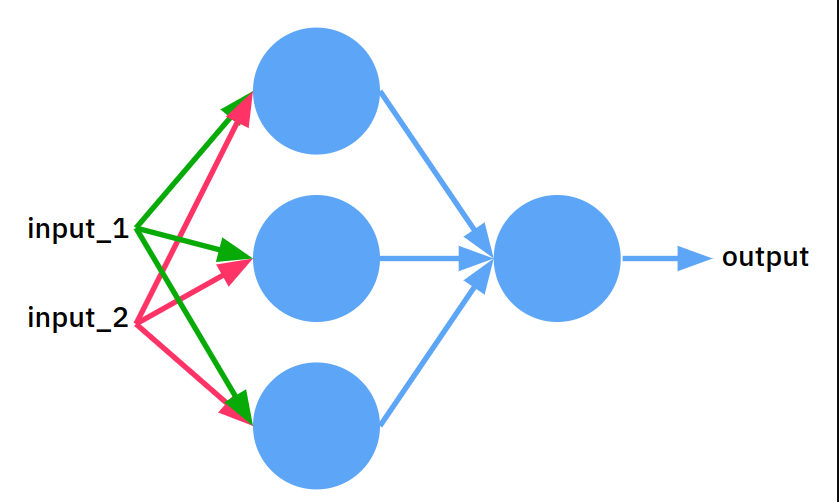

In [ ]:
from keras.layers import Dense
from keras.models import Sequential
import tensorflow as tf

tf.random.set_seed(9)

model = Sequential([
    Dense(3, input_shape=(2,), activation='linear'),
    Dense(1, activation='linear')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 3)                   │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

What happens here with the weights and the architecture itself?

The number of weights for one neuron is 2, because two inputs come in, and in addition each neuron has 1 bias, the first layer has 3 neurons, so the total number of weights on the first layer will be 9.

The second layer is waiting for 3 signals to input, 1 more bias.

We get 9 + 4 = 13 trained weights.

In [ ]:
model.get_weights()

[array([[-0.81246364,  0.66674626, -0.46119785],
        [-0.41077602,  0.79405165,  0.65508926]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[-1.0808624 ],
        [-0.31017613],
        [ 0.4721309 ]], dtype=float32),
 array([0.], dtype=float32)]

Take the same gradient descent with stochasticity.

In [ ]:
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

In [ ]:
%%time
model.fit(X_norm, y, epochs=200)

Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 97.4124 - mae: 9.4623  
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 63.5428 - mae: 7.5563
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 30.5175 - mae: 5.0717
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 9.3702 - mae: 2.5918 
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.7563 - mae: 1.3279
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1.6758 - mae: 1.0322
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 1.5039 - mae: 0.9737
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1.4369 - mae: 0.9546
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1.3848 - mae: 0.9390
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1.3365 - mae: 0.9232
Epoch 11/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1.2901 - mae: 0.9075
Epoch 12/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1.2451 - mae: 0.8919
Epoch 13/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24

In [ ]:
test_X = [[4, 2],
          [6, 2]]
test_X = mms.transform(test_X)
print("Neural network prediction: ")
print(model.predict(np.array(test_X)))


Neural network prediction: 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step
[[6.0130215]
 [8.006448 ]]


In [ ]:
import pandas as pd

pd.DataFrame({
    'x1': X[:, 0],
    'x2': X[:, 1],
    'True': np.squeeze(y),
    'Pred': np.squeeze(model.predict(X_norm))
}).head(10)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


,x1,x2,True,Pred
0,2,6,8,8.009119
1,7,1,8,8.005779
2,8,6,14,13.989397
3,5,7,12,11.996639
4,7,4,11,10.997922
5,4,7,11,10.999926
6,7,1,8,8.005779
7,8,8,16,15.984160
8,7,6,13,12.992684
9,7,4,11,10.997922
